File is dedicated to learning more/getting a sense of what the data looks like so we can ask better questions.

In [1]:
'''
    Read the CSV file(s) you want to work with.
'''
import pandas as pd
import time

start = time.time()

datasets_directory = "./datasets/"

df_conservative = pd.read_csv(datasets_directory + "conservative_comments.csv", index_col=0, parse_dates=['created_date'])
df_democrats = pd.read_csv(datasets_directory + "democrats_comments.csv", index_col=0, parse_dates=['created_date'])

if not df_conservative.empty:
    print(f"Conservative comments have been successfully read ({time.time() - start:.2f}s). Shape below.")
    print(df_conservative.shape)
    print(df_conservative.dtypes)
else:
    print("The file has not been successfully read.")

if not df_democrats.empty:
    print(f"Democrats comments have been successfully read ({time.time() - start:.2f}s). Shape below.")
    print(df_democrats.shape)
    print(df_democrats.dtypes)
else:
    print("The file has not been successfully read.")

Conservative comments have been successfully read (16.00s). Shape below.
(1755232, 15)
author                  object
body                    object
created_utc              int64
id                      object
is_submitter              bool
link_id                 object
locked                    bool
parent_id               object
permalink               object
retrieved_on             int64
score                    int64
stickied                  bool
subreddit               object
subreddit_id            object
created_date    datetime64[ns]
dtype: object
Democrats comments have been successfully read (16.00s). Shape below.
(73846, 15)
author                  object
body                    object
created_utc              int64
id                      object
is_submitter              bool
link_id                 object
locked                    bool
parent_id               object
permalink               object
retrieved_on             int64
score                    int64
stickied   

In [3]:
'''
    Format the dataframe for plotting the hourly comment frequency.
'''
import datetime as dt
import time

start = time.time()

# Round the 'created_date's to the nearest hour and place into 'created_hour'.
df_conservative['created_hour'] = df_conservative.apply(
    lambda row: row['created_date'].replace(
        microsecond = 0,
        second = 0,
        minute = 0
    ),
    axis=1
)

print(f"Lambda finished in {time.time() - start:.2f}s.")
start = time.time()

# Fill in the blanks b/c pandas doesn't do that for you? For some reason.
start_study = "2020-10-15"
end_study = "2021-01-15"

comments_per_hour = df_conservative.groupby(['created_hour']).size()
index = pd.date_range(start_study, end_study, freq='H')
comments_per_hour.index = pd.to_datetime(comments_per_hour.index)
comments_per_hour = comments_per_hour.reindex(index, fill_value=0)

# Play with the figure in the next cell.

print(f"Cell took {time.time() - start:.2f}s to complete.")

Lambda finished in 29.75s.
Cell took 0.10s to complete.


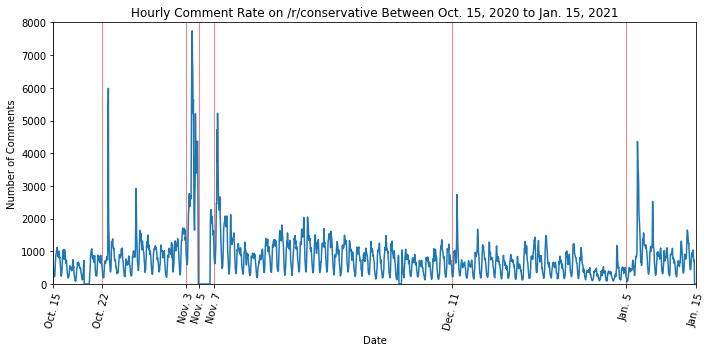

In [4]:
'''
    Play with the hourly frequency figure here. (Run with above.)
'''

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt

figures_directory = "./figures/"
figure_png_name = "conservative_frequency.png"

figure = plt.figure(
    figsize=(10, 5)
)

plt.plot(comments_per_hour)
plt.ylim(bottom=0, top=8000)
plt.xlim(dt.datetime(2020,10, 15), dt.datetime(2021, 1, 15))
plt.title('Hourly Comment Rate on /r/conservative Between Oct. 15, 2020 to Jan. 15, 2021')
plt.xlabel('Date')
plt.ylabel('Number of Comments')

# plt.tick_params(
#     axis='x',
#     which='minor', # Either 'minor', 'major', 'both
#     bottom=False
# )

Oct_15 = dt.datetime(2020, 10, 15)
Oct_22 = dt.datetime(2020, 10, 22)
Nov_1 = dt.datetime(2020, 11, 1)
Nov_3 = dt.datetime(2020, 11, 3)
Nov_5 = dt.datetime(2020, 11, 4, 20)
Nov_7 = dt.datetime(2020, 11, 7)
Dec_1 = dt.datetime(2020, 12, 1)
Dec_11 = dt.datetime(2020, 12, 11)
Jan_1 = dt.datetime(2021, 1, 1)
Jan_5 = dt.datetime(2021, 1, 5)
Jan_15 = dt.datetime(2021, 1, 15)

plt.xticks(
    [Oct_15, Oct_22, Nov_3, Nov_5, Nov_7, Dec_11, Jan_5, Jan_15],
    ["Oct. 15", "Oct. 22", "Nov. 3", "Nov. 5", "Nov. 7", "Dec. 11", "Jan. 5", "Jan. 15"],
    rotation=75
)

plt.grid(
    axis='x',
    which='major',
    linestyle='-',
    linewidth=0.5,
    color='r'
)

plt.tight_layout()

plt.savefig(fname=figures_directory + figure_png_name, transparent=False, facecolor='white') # Facecolor makes the png file not screwed.


In [5]:
'''
    Finding the hours with the most activity.
'''
import pandas as pd

df_conservative.dtypes
# df_conservative.groupby(['created_hour']).size().nlargest(50)

author                  object
body                    object
comment_type           float64
created_utc            float64
id                      object
is_submitter           float64
link_id                 object
locked                 float64
parent_id               object
permalink               object
retrieved_on           float64
score                  float64
stickied               float64
subreddit               object
subreddit_id            object
created_date    datetime64[ns]
created_hour    datetime64[ns]
dtype: object

In [126]:
'''
    Posts from most active periods.
'''
import pandas as pd

df_focus = df_conservative[(df_conservative['created_date'] > pd.to_datetime('2020-11-07')) & (df_conservative['created_date'] < pd.to_datetime('2020-11-08'))]

pd.options.display.max_colwidth = 100
print(df_focus.dtypes)
df_focus.groupby(['link_id']).size().nlargest(15)

author                  object
body                    object
comment_type           float64
created_utc            float64
id                      object
is_submitter           float64
link_id                 object
locked                 float64
parent_id               object
permalink               object
retrieved_on           float64
score                  float64
stickied               float64
subreddit               object
subreddit_id            object
created_date    datetime64[ns]
created_hour    datetime64[ns]
dtype: object


link_id
t3_jpu2rx    10610
t3_jpk4wb     7530
t3_jpu2i4     6930
t3_jpu4nd     3385
t3_jq19e7     2581
t3_jpudbh     1175
t3_jptt2l      600
t3_jq3sq2      581
t3_jpfj2v      558
t3_jpu0x2      554
t3_jpc1xn      493
t3_jppu1u      477
t3_jpsloz      468
t3_jphgqp      466
t3_jpy8cm      464
dtype: int64

In [8]:
'''
    Plotting the number of unique users that post in the community.
'''
import datetime as dt
import time

start = time.time()

# Round the 'created_date's to the nearest hour and place into 'created_hour'.
df_conservative['created_hour'] = df_conservative.apply(
    lambda row: row['created_date'].replace(
        microsecond = 0,
        second = 0,
        minute = 0
    ),
    axis=1
)

print(f"Lambda finished in {time.time() - start:.2f}s.")
start = time.time()

Lambda finished in 24.57s.


In [2]:
# df_conservative.groupby(['created_hour']).size().nlargest(50)
len(df_democrats['author'].unique())

11522